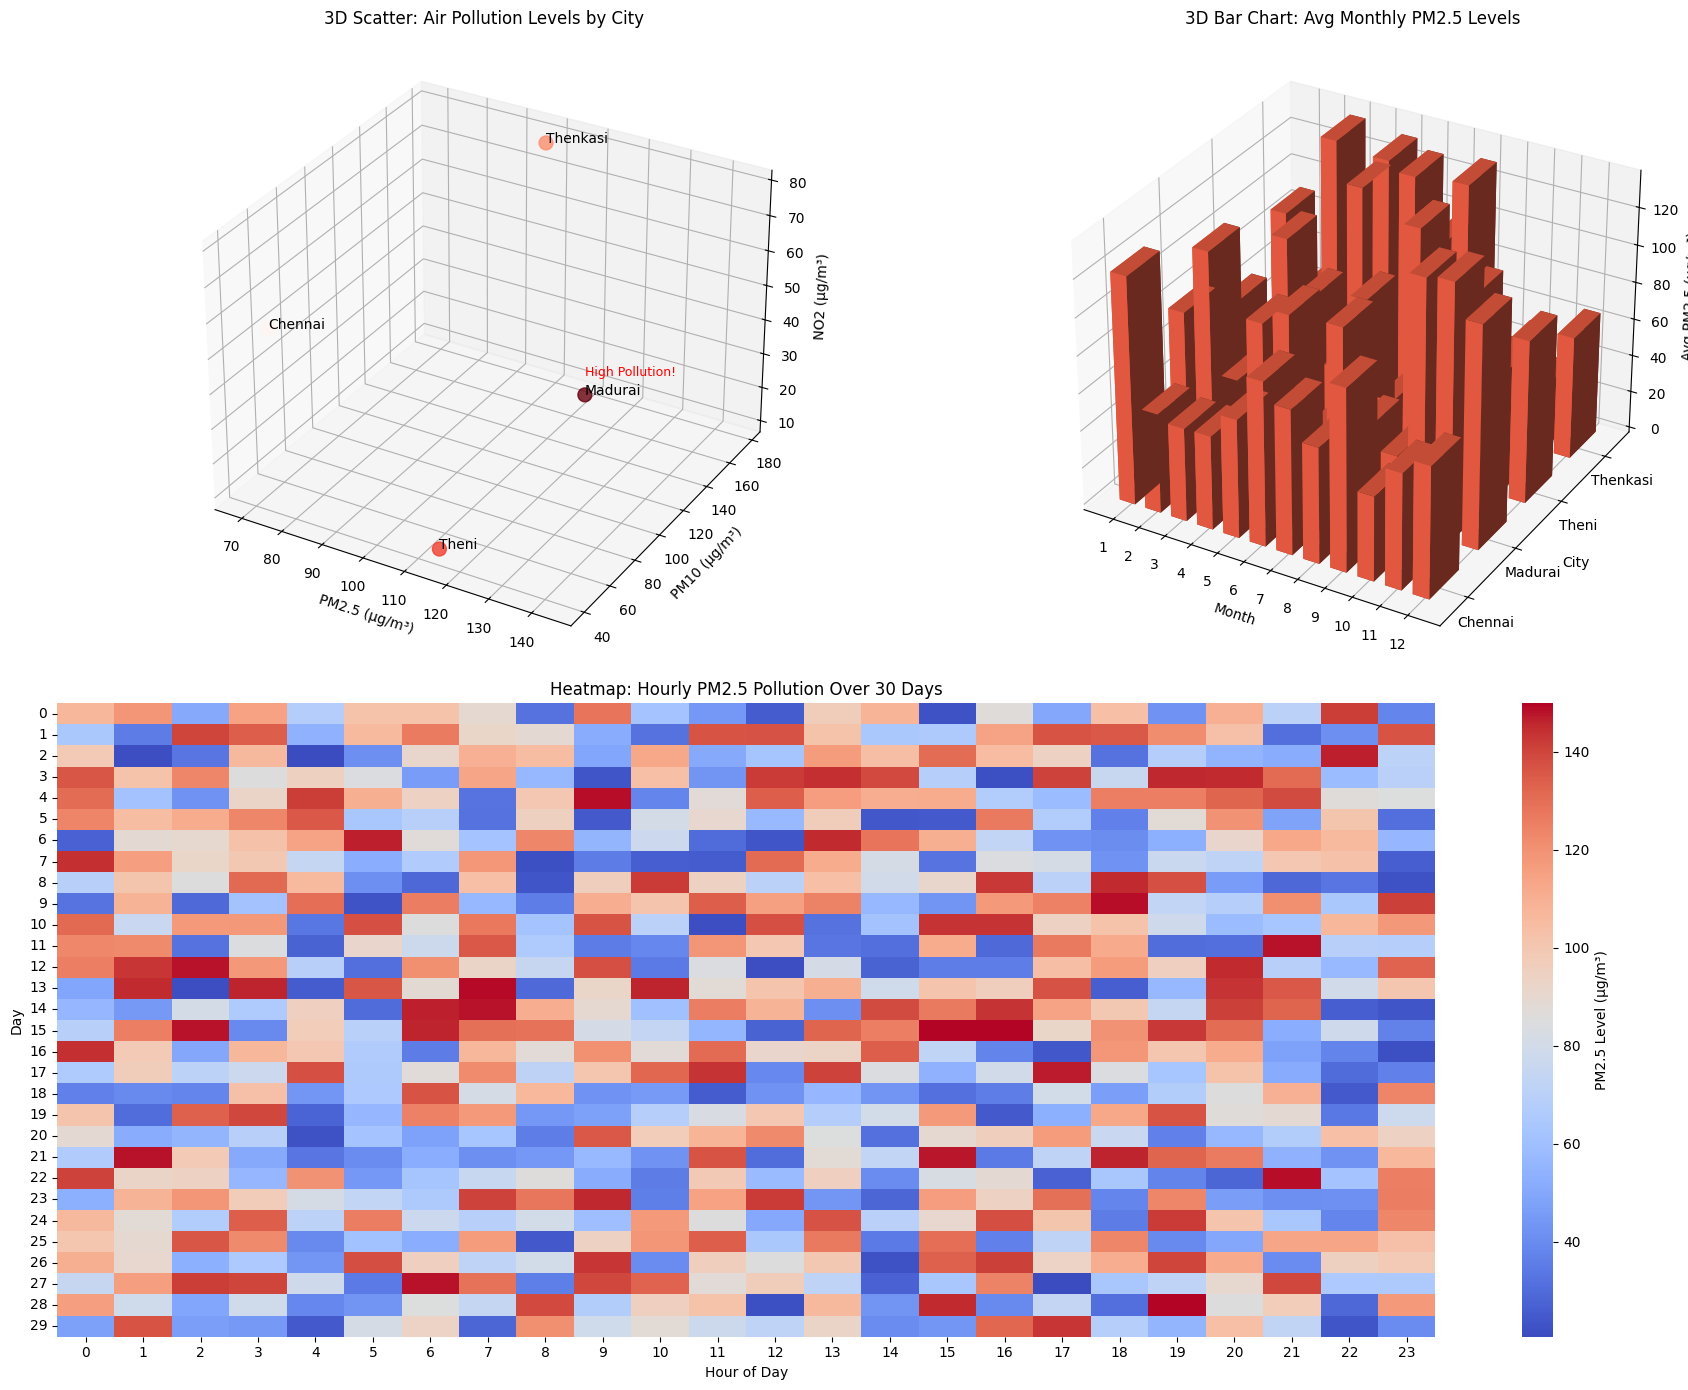

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  
import seaborn as sns

cities = ['Chennai', 'Madurai', 'Theni', 'Thenkasi']
num_cities = len(cities)

np.random.seed(42)
pm25 = np.random.uniform(20, 150, num_cities)
pm10 = np.random.uniform(30, 200, num_cities)
no2 = np.random.uniform(10, 80, num_cities)

months = np.arange(1, 13)
avg_pm25 = np.random.uniform(30, 140, (num_cities, len(months)))
avg_pm10 = np.random.uniform(40, 180, (num_cities, len(months)))
avg_no2 = np.random.uniform(15, 70, (num_cities, len(months)))

days = 30
hours = 24
heatmap_data = np.random.uniform(20, 150, (days, hours))



fig = plt.figure(figsize=(18, 14))


ax1 = fig.add_subplot(2, 2, 1, projection='3d')
scatter = ax1.scatter(pm25, pm10, no2, c=pm25, cmap='Reds', s=100, alpha=0.8)
for i, city in enumerate(cities):
    ax1.text(pm25[i], pm10[i], no2[i], city, fontsize=10, color='black')
ax1.set_xlabel('PM2.5 (µg/m³)')
ax1.set_ylabel('PM10 (µg/m³)')
ax1.set_zlabel('NO2 (µg/m³)')
ax1.set_title('3D Scatter: Air Pollution Levels by City')


threshold_pm25 = 120
for i, val in enumerate(pm25):
    if val > threshold_pm25:
        ax1.text(pm25[i], pm10[i], no2[i] + 5, 'High Pollution!', color='red', fontsize=9)


ax2 = fig.add_subplot(2, 2, 2, projection='3d')
_x = np.arange(len(months))
_y = np.arange(num_cities)
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()
z = np.zeros_like(x)
dx = dy = 0.6
dz = avg_pm25.ravel()
ax2.bar3d(x, y, z, dx, dy, dz, shade=True, color='tomato')
ax2.set_xticks(_x + dx/2)
ax2.set_xticklabels(months)
ax2.set_yticks(_y + dy/2)
ax2.set_yticklabels(cities)
ax2.set_xlabel('Month')
ax2.set_ylabel('City')
ax2.set_zlabel('Avg PM2.5 (µg/m³)')
ax2.set_title('3D Bar Chart: Avg Monthly PM2.5 Levels')


ax3 = fig.add_subplot(2, 1, 2)
sns.heatmap(heatmap_data, cmap='coolwarm', cbar_kws={'label': 'PM2.5 Level (µg/m³)'}, ax=ax3)
ax3.set_xlabel('Hour of Day')
ax3.set_ylabel('Day')
ax3.set_title('Heatmap: Hourly PM2.5 Pollution Over 30 Days')

plt.tight_layout()
plt.show()

